# Unsupervised Learning

**K-means clustering** is an unsupervised machine learning algorithm used to partition a given dataset into distinct groups or clusters. It is a popular clustering technique that aims to identify patterns and similarities in the data based on their features or attributes.

Implementing the K-Means Clustering algorithm

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [10]:

def remove_species_column(dataset):
    species = dataset.iloc[:, -1]
    dataset = dataset.iloc[:, :-1]
    return dataset, species

In [11]:
def plot_clusters(data, labels, centroids):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering')
    plt.show()

In [12]:
def k_means_clustering(dataset, num_clusters, num_iterations):
    data = dataset.to_numpy()
    np.random.seed(42)
    centroids = data[np.random.choice(range(len(data)), num_clusters, replace=False)]
    for _ in range(num_iterations):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=-1)
        labels = np.argmin(distances, axis=-1)
        new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(num_clusters)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

In [13]:
def plot_pca(data, labels):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('Principal Component Analysis')
    plt.show()

In [14]:
def pca(dataset):
    data = dataset.to_numpy()
    # Centering the data
    centered_data = data - np.mean(data, axis=0)
    # Computing the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)
    # Computing eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sorting eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    # Selecting the top 3 eigenvectors
    top_eigenvectors = sorted_eigenvectors[:, :3]
    # Transforming the data
    transformed_data = centered_data @ top_eigenvectors
    return transformed_data, sorted_eigenvalues[:3]



In [15]:
# Load the dataset
dataset = pd.read_csv('Iris_Dataset.csv')

# Remove the Species column
dataset, species = remove_species_column(dataset)

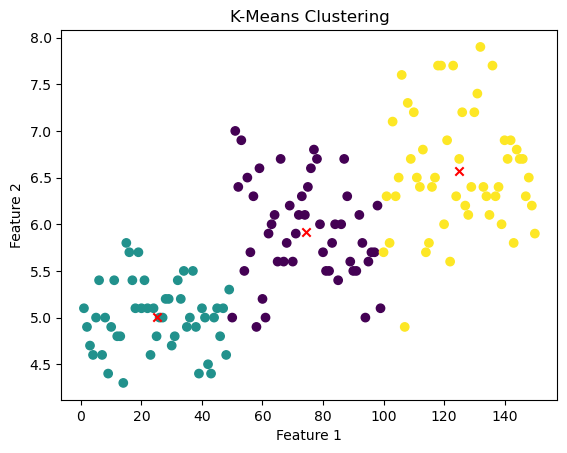

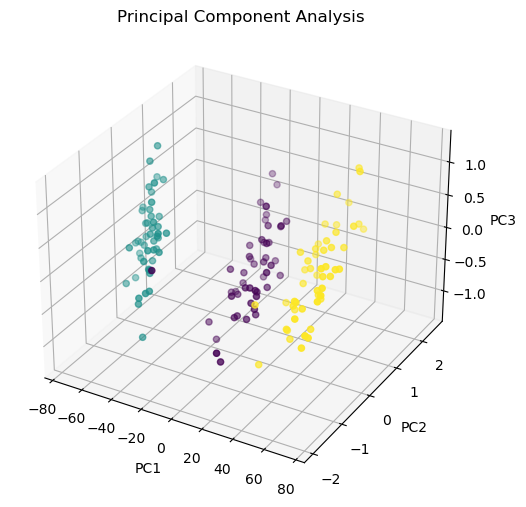

In [16]:
# Perform K-Means Clustering
num_clusters = 3
num_iterations = 100
labels, centroids = k_means_clustering(dataset, num_clusters, num_iterations)

# Plot the clusters
plot_clusters(dataset.to_numpy(), labels, centroids)

# Perform Principal Component Analysis (PCA)
transformed_data, eigenvalues = pca(dataset)

# Plot the PCA results
plot_pca(transformed_data, labels)